## Data Preprocessing &  Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/git_code/final_merged_dataset.csv')

In [ ]:
# df = pd.read_csv("final_merged_dataset.csv")
df.head().style.set_properties(
**{
'background-color': 'OliveDrab',
'color': 'white',
'border-color': 'darkblack'
})

,Date,Year,Month,Day,Precipitation,Temp Max,Temp Min,streamflow (Mean)
0,1/31/2001,2001,1,31,128.757000,24.706129,10.385806,21.070000
1,2/28/2001,2001,2,28,82.173000,22.654286,10.073214,20.760000
2,3/31/2001,2001,3,31,64.114000,21.950000,9.498387,20.450000
3,4/30/2001,2001,4,30,75.216000,18.462333,7.417333,36.410000
4,5/31/2001,2001,5,31,16.696000,17.470645,3.625484,23.590000


### Data cleaning - handling missing values and outlier detection


First 5 Rows:
            Year  Month  Day  Precipitation  Temp Max  Temp Min  \
Date                                                              
2001-01-31  2001      1   31        128.757    24.706    10.386   
2001-02-28  2001      2   28         82.173    22.654    10.073   
2001-03-31  2001      3   31         64.114    21.950     9.498   
2001-04-30  2001      4   30         75.216    18.462     7.417   
2001-05-31  2001      5   31         16.696    17.471     3.625   

            streamflow (Mean)  
Date                           
2001-01-31             21.070  
2001-02-28             20.760  
2001-03-31             20.450  
2001-04-30             36.410  
2001-05-31             23.590  
Missing Values:
 Year                 0
Month                0
Day                  0
Precipitation        0
Temp Max             0
Temp Min             0
streamflow (Mean)    0
dtype: int64


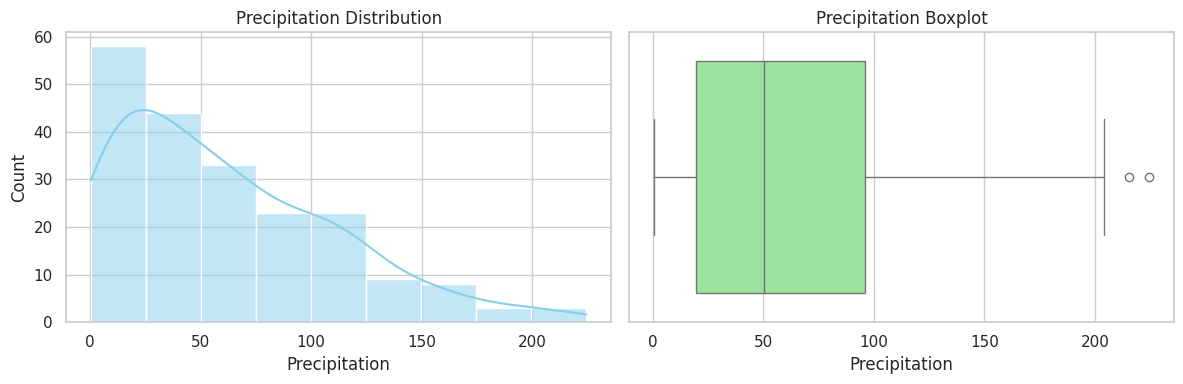

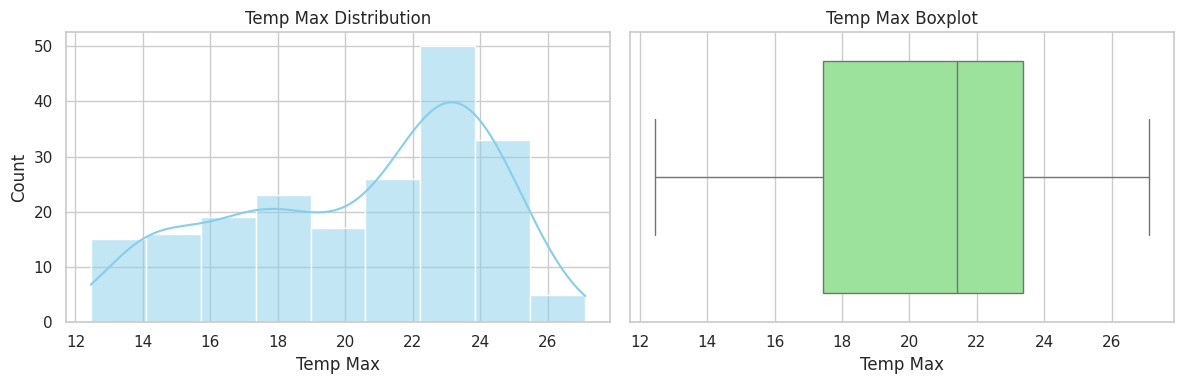

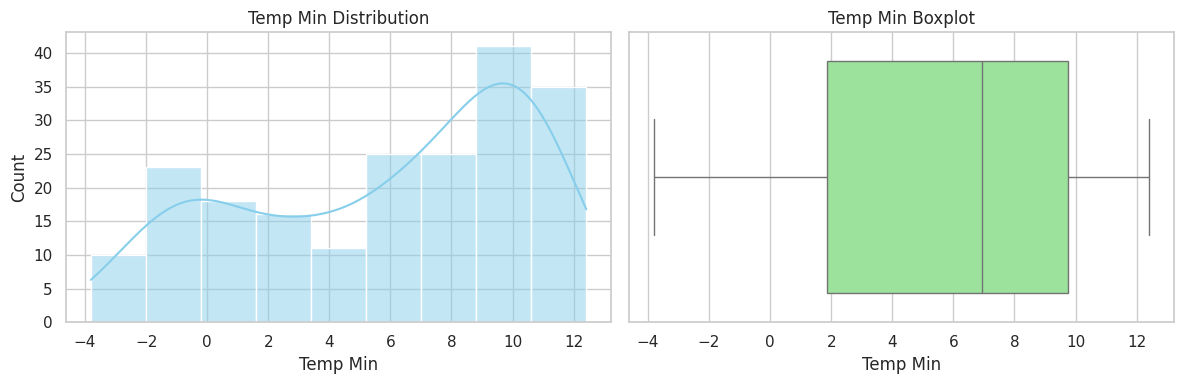

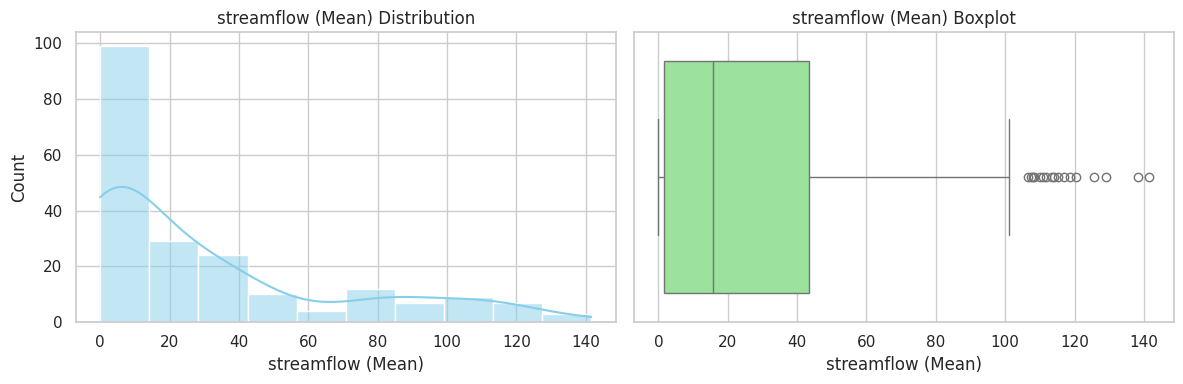

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 2. Load Dataset & Basic Checks
# df = pd.read_csv('final_merged_dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# First 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Numeric columns for distribution & outlier detection
cols_to_plot = ['Precipitation', 'Temp Max', 'Temp Min', 'streamflow (Mean)']

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions & boxplots for selected numeric columns
for col in cols_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Distribution plot
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} Distribution')

    # Boxplot for outlier detection
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

In [ ]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'Precipitation', 'Temp Max', 'Temp Min',
       'streamflow (Mean)'],
      dtype='object')


### Time Series Analysis

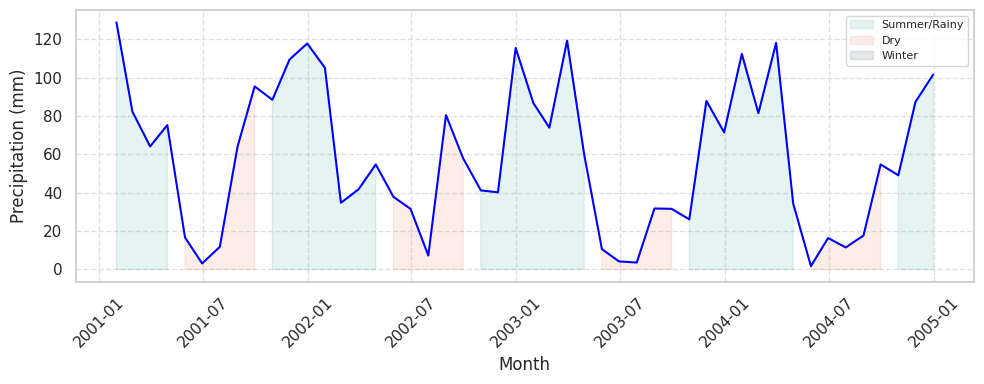

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your dataset
# df = pd.read_csv('final_merged_dataset.csv')

# Handle potential 'Date' column/index conflict before resetting
if 'Date' in df.columns and df.index.name == 'Date':
    # If 'Date' is both a column and the index name, drop the existing column
    df = df.drop(columns=['Date'])

# Reset the index to convert the 'Date' index back into a column
df = df.reset_index()

# The 'Date' column is already correctly parsed and is now a regular column.
# The following line is redundant and can be removed.
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Sort by Date (now 'Date' is a column, not an ambiguous index/column)
df = df.sort_values('Date')

# Filter for 2001–2004
df_sub = df[(df['Date'] >= '2001-01-01') & (df['Date'] <= '2004-12-31')]

# Assign hydrological seasons
def get_hydro_season(month):
    if month >= 10 or month <= 4:
        return 'Summer/Rainy'
    elif month >= 5 and month <= 9:
        return 'Dry'
    else:
        return 'Winter'

df_sub['Season'] = df_sub['Date'].dt.month.apply(get_hydro_season)

# Define colors
season_colors = {
    'Summer/Rainy': '#2A9D8F',  # teal
    'Dry': '#E76F51',           # orange/red
    'Winter': '#264653'         # dark blue
}

# Plot Precipitation
plt.figure(figsize=(10, 4))
plt.plot(df_sub['Date'], df_sub['Precipitation'], color='blue', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True, linestyle='--', alpha=0.6)

# Seasonal shading
for season, color in season_colors.items():
    mask = df_sub['Season'] == season
    plt.fill_between(df_sub['Date'], y1=0, y2=df_sub['Precipitation'], where=mask,
                     color=color, alpha=0.12, label=season)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

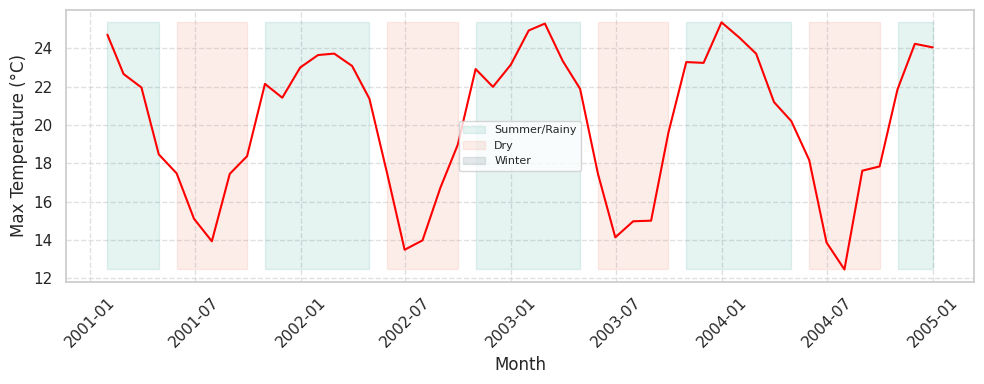

In [ ]:
# Max Temperature
plt.figure(figsize=(10,4))
plt.plot(df_sub['Date'], df_sub['Temp Max'], color='red', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Max Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)

# Seasonal shading
for season, color in season_colors.items():
    mask = df_sub['Season'] == season
    plt.fill_between(df_sub['Date'], y1=df_sub['Temp Max'].min(),
                     y2=df_sub['Temp Max'].max(), where=mask,
                     color=color, alpha=0.12, label=season)

plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


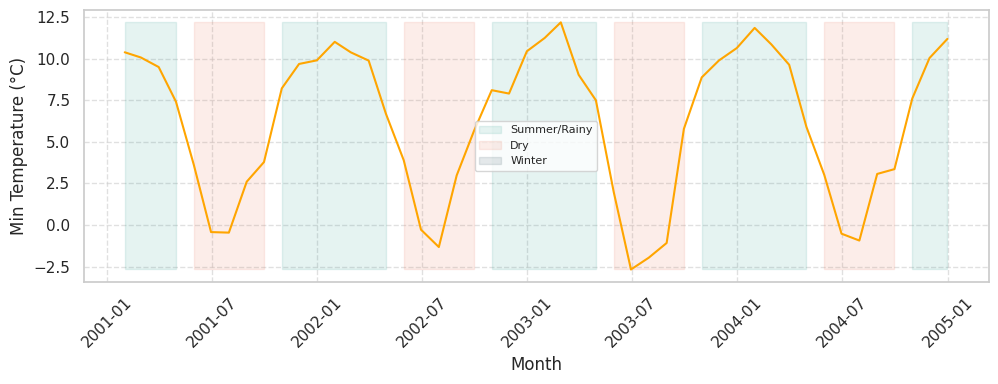

In [ ]:
# Min Temperature
plt.figure(figsize=(10,4))
plt.plot(df_sub['Date'], df_sub['Temp Min'], color='orange', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Min Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)

# Seasonal shading
for season, color in season_colors.items():
    mask = df_sub['Season'] == season
    plt.fill_between(df_sub['Date'], y1=df_sub['Temp Min'].min(),
                     y2=df_sub['Temp Min'].max(), where=mask,
                     color=color, alpha=0.12, label=season)

plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


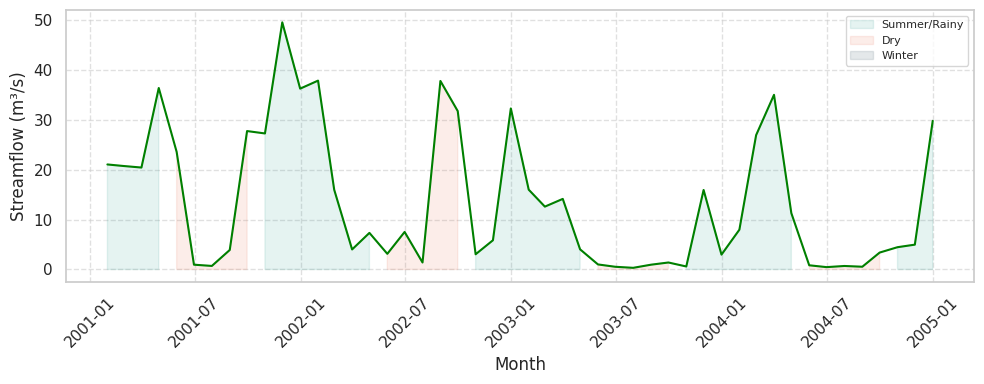

In [ ]:
# Streamflow
plt.figure(figsize=(10,4))
plt.plot(df_sub['Date'], df_sub['streamflow (Mean)'], color='green', linewidth=1.5)
plt.xlabel('Month')
plt.ylabel('Streamflow (m³/s)')
plt.grid(True, linestyle='--', alpha=0.6)

# Seasonal shading
for season, color in season_colors.items():
    mask = df_sub['Season'] == season
    plt.fill_between(df_sub['Date'], y1=0, y2=df_sub['streamflow (Mean)'], where=mask,
                     color=color, alpha=0.12, label=season)

plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()



First 5 Rows:
            Year  Month  Day  Precipitation  Temp Max  Temp Min  \
Date                                                              
2001-01-31  2001      1   31        128.757    24.706    10.386   
2001-02-28  2001      2   28         82.173    22.654    10.073   
2001-03-31  2001      3   31         64.114    21.950     9.498   
2001-04-30  2001      4   30         75.216    18.462     7.417   
2001-05-31  2001      5   31         16.696    17.471     3.625   

            streamflow (Mean)  
Date                           
2001-01-31             21.070  
2001-02-28             20.760  
2001-03-31             20.450  
2001-04-30             36.410  
2001-05-31             23.590  
Missing Values:
 Year                 0
Month                0
Day                  0
Precipitation        0
Temp Max             0
Temp Min             0
streamflow (Mean)    0
dtype: int64


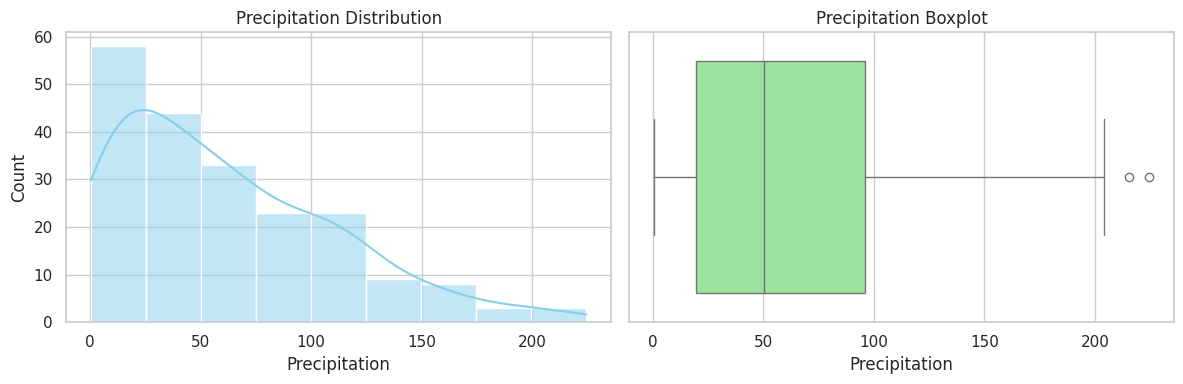

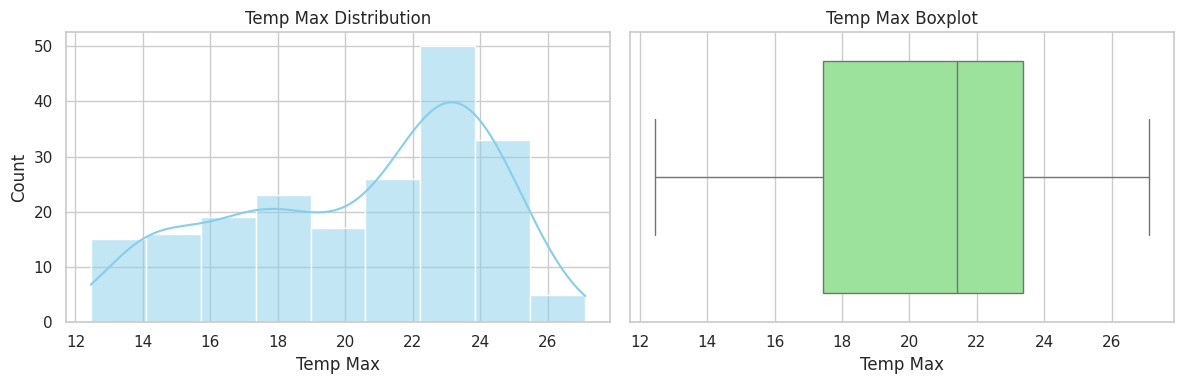

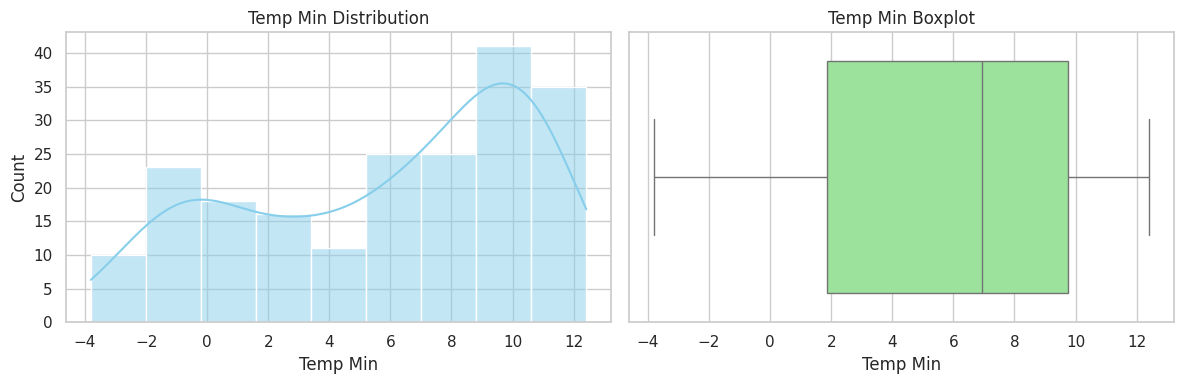

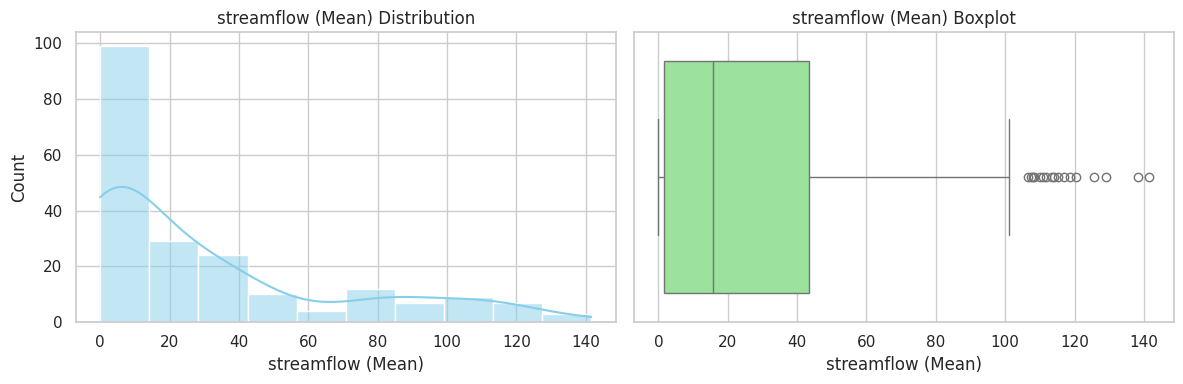

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 2. Load Dataset & Basic Checks
# df = pd.read_csv('final_merged_dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# First 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Numeric columns for distribution & outlier detection
cols_to_plot = ['Precipitation', 'Temp Max', 'Temp Min', 'streamflow (Mean)']

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions & boxplots for selected numeric columns
for col in cols_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Distribution plot
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} Distribution')

    # Boxplot for outlier detection
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

### 12-Month Moving Average

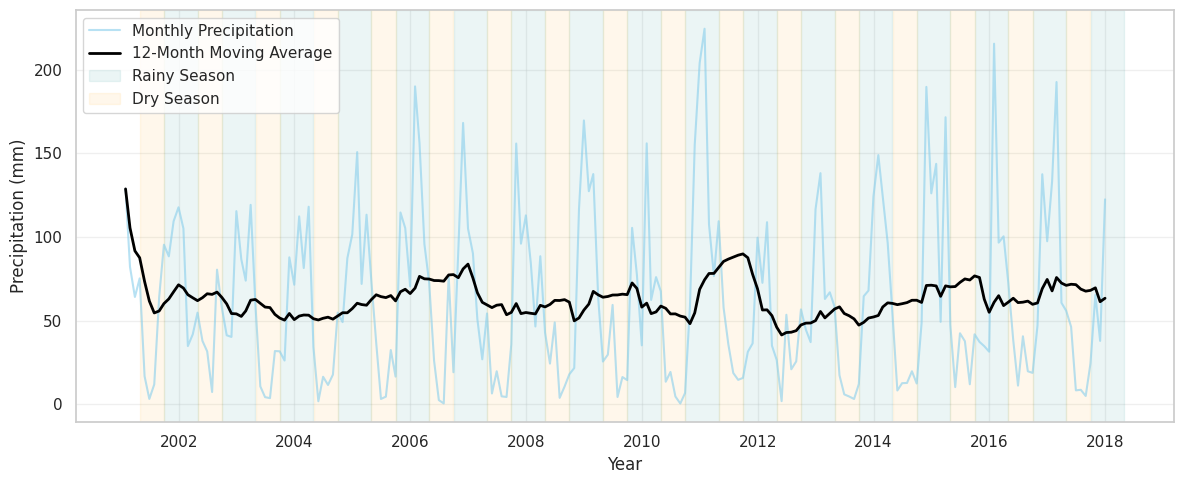

In [ ]:
mport pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/drive/My Drive/git_code/final_merged_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# Compute 12-month moving average for precipitation
df['Precipitation_12MMA'] = df['Precipitation'].rolling(window=12, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Precipitation'], label='Monthly Precipitation', color='skyblue', alpha=0.6)
plt.plot(df.index, df['Precipitation_12MMA'], label='12-Month Moving Average', color='black', linewidth=2)

# Shade wet (Oct–Apr) and dry (May–Sep) seasons
for year in df.index.year.unique():
    plt.axvspan(f'{year}-10-01', f'{year+1}-04-30', color='teal', alpha=0.08, label='Rainy Season' if year == df.index.year.min() else "")
    plt.axvspan(f'{year}-05-01', f'{year}-09-30', color='orange', alpha=0.08, label='Dry Season' if year == df.index.year.min() else "")


plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

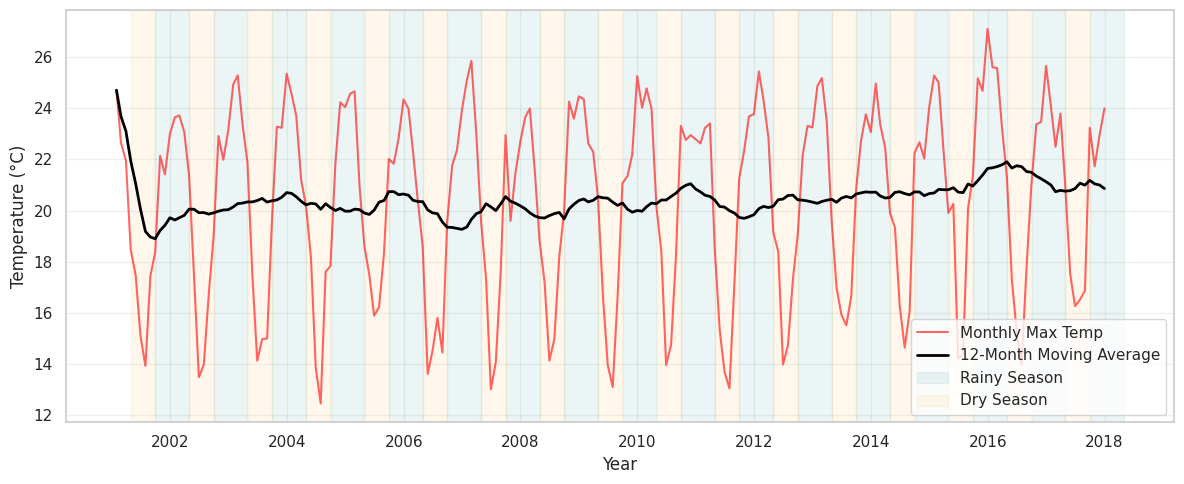

In [ ]:
# Compute 12-month moving average for maximum temperature
df['TempMax_12MMA'] = df['Temp Max'].rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Temp Max'], label='Monthly Max Temp', color='red', alpha=0.6)
plt.plot(df.index, df['TempMax_12MMA'], label='12-Month Moving Average', color='black', linewidth=2)

# Seasonal shading
for year in df.index.year.unique():
    plt.axvspan(f'{year}-10-01', f'{year+1}-04-30', color='teal', alpha=0.08, label='Rainy Season' if year == df.index.year.min() else "")
    plt.axvspan(f'{year}-05-01', f'{year}-09-30', color='orange', alpha=0.08, label='Dry Season' if year == df.index.year.min() else "")


plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


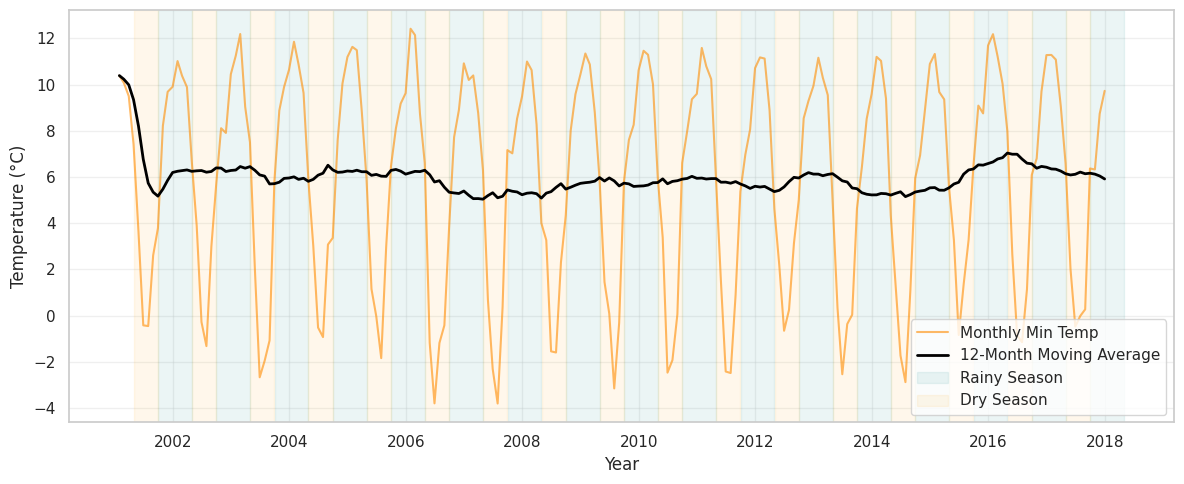

In [ ]:
# Compute 12-month moving average for minimum temperature
df['TempMin_12MMA'] = df['Temp Min'].rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Temp Min'], label='Monthly Min Temp', color='darkorange', alpha=0.6)
plt.plot(df.index, df['TempMin_12MMA'], label='12-Month Moving Average', color='black', linewidth=2)

# Seasonal shading
for year in df.index.year.unique():
    plt.axvspan(f'{year}-10-01', f'{year+1}-04-30', color='teal', alpha=0.08, label='Rainy Season' if year == df.index.year.min() else "")
    plt.axvspan(f'{year}-05-01', f'{year}-09-30', color='orange', alpha=0.08, label='Dry Season' if year == df.index.year.min() else "")


plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


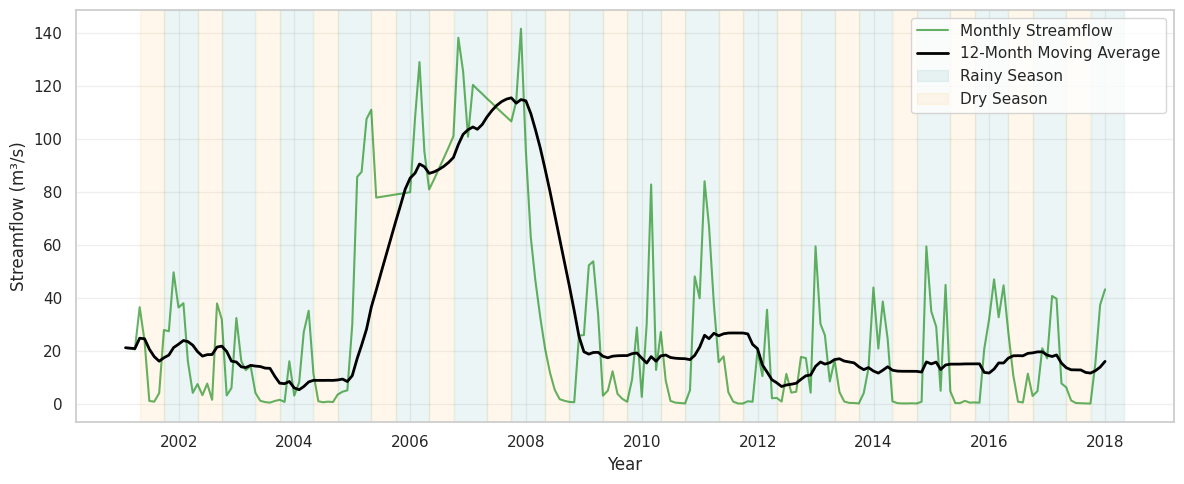

In [ ]:
# Compute 12-month moving average for streamflow
import pandas as pd
import matplotlib.pyplot as plt

# Reload dataset and set 'Date' as index to ensure DatetimeIndex
df = pd.read_csv('/content/drive/My Drive/git_code/final_merged_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

df['Streamflow_12MMA'] = df['streamflow (Mean)'].rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['streamflow (Mean)'], label='Monthly Streamflow', color='green', alpha=0.6)
plt.plot(df.index, df['Streamflow_12MMA'], label='12-Month Moving Average', color='black', linewidth=2)

# Seasonal shading
for year in df.index.year.unique():
    plt.axvspan(f'{year}-10-01', f'{year+1}-04-30', color='teal', alpha=0.08, label='Rainy Season' if year == df.index.year.min() else "")
    plt.axvspan(f'{year}-05-01', f'{year}-09-30', color='orange', alpha=0.08, label='Dry Season' if year == df.index.year.min() else "")

plt.xlabel('Year')
plt.ylabel('Streamflow (m³/s)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load dataset
# df = pd.read_csv('final_merged_dataset.csv', parse_dates=['Date'])
# df.set_index('Date', inplace=True)

# Features to test
features = ['Precipitation', 'Temp Max', 'Temp Min', 'streamflow (Mean)']

# Function to run ADF test
def adf_summary(series):
    result = adfuller(series.dropna())
    return {
        'ADF Statistic': round(result[0], 2),
        'p-value': round(result[1], 2),
        'Stationary': 'Yes' if result[1] < 0.05 else 'No'
    }

# Collect results
summary = []
for feature in features:
    original = adf_summary(df[feature])
    differenced = adf_summary(df[feature].diff())
    summary.append({
        'Feature': feature,
        'ADF Statistic (Original)': original['ADF Statistic'],
        'p-value (Original)': original['p-value'],
        'Stationary (Original)': original['Stationary'],
        'ADF Statistic (Differenced)': differenced['ADF Statistic'],
        'p-value (Differenced)': differenced['p-value'],
        'Stationary (Differenced)': differenced['Stationary']
    })

# Display results
summary_df = pd.DataFrame(summary)
print(summary_df)

             Feature  ADF Statistic (Original)  p-value (Original)  \
0      Precipitation                    -4.050               0.000   
1           Temp Max                    -2.960               0.040   
2           Temp Min                    -2.730               0.070   
3  streamflow (Mean)                    -2.210               0.200   

  Stationary (Original)  ADF Statistic (Differenced)  p-value (Differenced)  \
0                   Yes                       -8.770                  0.000   
1                   Yes                      -14.590                  0.000   
2                    No                       -5.890                  0.000   
3                    No                       -3.620                  0.010   

  Stationary (Differenced)  
0                      Yes  
1                      Yes  
2                      Yes  
3                      Yes  


## Scatter Plot Anlaysis

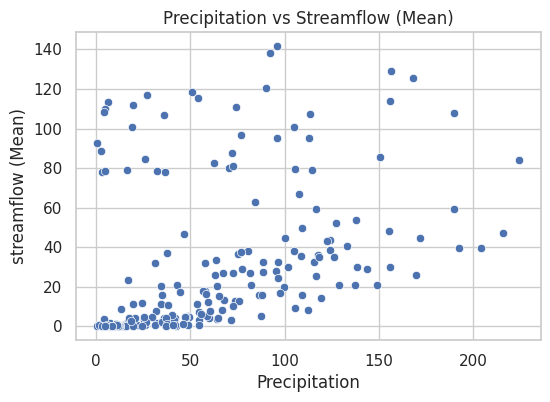

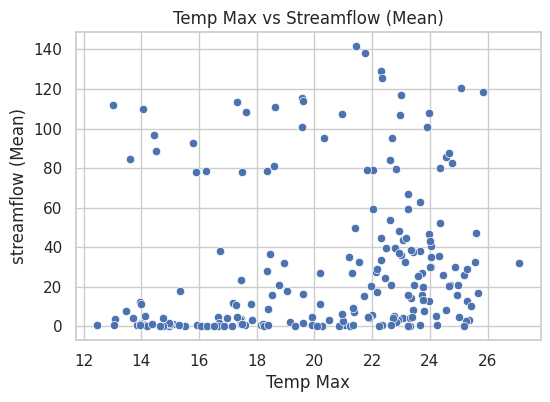

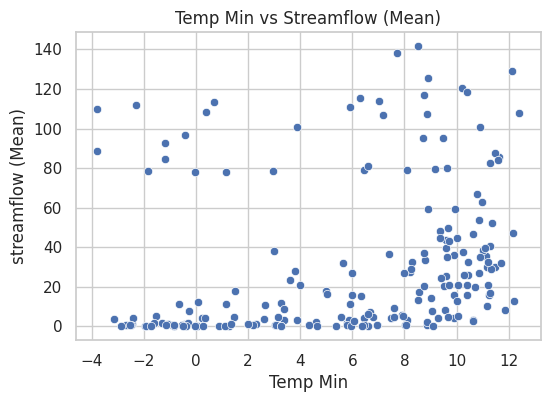

In [ ]:

# Scatter plots: features vs Streamflow
for col in ['Precipitation', 'Temp Max', 'Temp Min']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['streamflow (Mean)'])
    plt.title(f'{col} vs Streamflow (Mean)')
    plt.show()


### Rename Columns

In [ ]:

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Display column names before renaming for verification
print("Columns before renaming:")
print(df.columns.tolist())

# Rename columns to more concise and model-friendly names
df.rename(columns={
    'Precipitation': 'P(t)',     # Precipitation
    'Temp Max': 'T_max(t)',      # Maximum Temperature
    'Temp Min': 'T_min(t)',      # Minimum Temperature
    'streamflow (Mean)': 'Q(t)'  # Streamflow (Mean)
}, inplace=True)

# Confirm the new column names after renaming
print("\nColumns after renaming:")
print(df.columns.tolist())

Columns before renaming:
['Year', 'Month', 'Day', 'Precipitation', 'Temp Max', 'Temp Min', 'streamflow (Mean)', 'Precipitation_12MMA', 'TempMax_12MMA', 'TempMin_12MMA', 'Streamflow_12MMA']

Columns after renaming:
['Year', 'Month', 'Day', 'P(t)', 'T_max(t)', 'T_min(t)', 'Q(t)', 'Precipitation_12MMA', 'TempMax_12MMA', 'TempMin_12MMA', 'Streamflow_12MMA']


### Feature engineering for scenarios - Creating lagged features for all scenarios

In [ ]:

for i in range(1, 3):  #  Precipitation-->P(t) up to 1 previous data points - P(t-1): (1 previous months)
    df[f'P(t-{i})'] = df['P(t)'].shift(i)

for i in range(1, 3):  # Temperature--> T_max(t) && T_min(t) to 1 previous data points: T_max(t-1), T_min(t-1) (1 past months)
    df[f'T_max(t-{i})'] = df['T_max(t)'].shift(i)
    df[f'T_min(t-{i})'] = df['T_min(t)'].shift(i)
    #df[f'Q(t-{i})'] = df['Q(t)'].shift(i)

for i in range(1, 3):  # Streamflow-->Q(t) up to 2 previous data points: Q(t-1) to Q(t-2) (two past months)
    df[f'Q(t-{i})'] = df['Q(t)'].shift(i)

# Define target variable: streamflow at time t+1
# df['Q(t+1)'] = df['Q(t)'].shift(-1).fillna(df['Q(t)'].iloc[-1])

# Define the target variable: streamflow for next month: (Q at t+1)
df['Q(t+1)'] = df['Q(t)'].shift(-1)

# Remove rows with any missing values introduced by shifting
df.dropna(inplace=True)


### Creating Scenarios: Scenario 1(S1) - Precipitation

In [ ]:

import os

# Ensure 'Date' is a column
if 'Date' not in df.columns:
    df.reset_index(inplace=True)

# Create a directory to save Scenario files
Scenarios_dir = "Scenarios"
os.makedirs(Scenarios_dir, exist_ok=True)

# Extract only the relevant lagged precipitation features and the timestamp
df_s1 = df[['Date', 'P(t-2)', 'P(t-1)', 'P(t)', 'Q(t+1)']].dropna()

# Export the processed Scenario 1 data to CSV
df_s1.to_csv('Scenarios/processed_data_scenario1.csv', index=False)

# Print a preview of the processed data
print("Scenario 1 (S1) - Precipitation:")
print(df_s1.head())  # Display the first few rows

Scenario 1 (S1) - Precipitation:
        Date  P(t-2)  P(t-1)   P(t)  Q(t+1)
0 2001-03-31 128.757  82.173 64.114  36.410
1 2001-04-30  82.173  64.114 75.216  23.590
2 2001-05-31  64.114  75.216 16.696   0.960
3 2001-06-30  75.216  16.696  3.134   0.710
4 2001-07-31  16.696   3.134 11.817   3.910


### Scenario 2(S2) - Maximum temperature T_max(t)

In [ ]:
# Extract only the relevant lagged maximum temperature features and the timestamp
df_s2 = df[['Date', 'T_max(t-2)', 'T_max(t-1)', 'T_max(t)', 'Q(t+1)']].dropna()

# Extract the processed Scenario 2 data to CSV
df_s2.to_csv('Scenarios/processed_data_scenario2.csv', index=False)

# Print a preview of the processed data
print("\nScenario 2 (S2) - Maximum Temperature:")
print(df_s2.head()) # print first few rows


Scenario 2 (S2) - Maximum Temperature:
        Date  T_max(t-2)  T_max(t-1)  T_max(t)  Q(t+1)
0 2001-03-31      24.706      22.654    21.950  36.410
1 2001-04-30      22.654      21.950    18.462  23.590
2 2001-05-31      21.950      18.462    17.471   0.960
3 2001-06-30      18.462      17.471    15.104   0.710
4 2001-07-31      17.471      15.104    13.927   3.910


### Scenario 3(S3) - Minimum temperature T_min(t)

In [ ]:
# Extract only the relevant lagged minimum temperature features and the timestamp
df_s3 = df[['Date', 'T_min(t-2)', 'T_min(t-1)', 'T_min(t)', 'Q(t+1)']].dropna()

# Extract the processed Scenario 3 data to CSV
df_s3.to_csv('Scenarios/processed_data_scenario3.csv', index=False)

# Print a preview of the processed data
print("\nScenario 3 (S3) - Temp Min:")
print(df_s3.head()) # print first few rows


Scenario 3 (S3) - Temp Min:
        Date  T_min(t-2)  T_min(t-1)  T_min(t)  Q(t+1)
0 2001-03-31      10.386      10.073     9.498  36.410
1 2001-04-30      10.073       9.498     7.417  23.590
2 2001-05-31       9.498       7.417     3.625   0.960
3 2001-06-30       7.417       3.625    -0.424   0.710
4 2001-07-31       3.625      -0.424    -0.456   3.910


### Scenario 4(S4) - Minimum temperature T_min(t)

In [ ]:
# Extract only the relevant lagged minimum temperature features and the timestamp
df_s4 = df[['Date', 'Q(t-2)', 'Q(t-1)', 'Q(t)', 'Q(t+1)']].dropna()

# Extract the processed Scenario 4 data to CSV
df_s4.to_csv('Scenarios/processed_data_scenario4.csv', index=False)

# Print a preview of the processed data
print("\nScenario 4 (S4) - Streamflow- streamflow Mean:")
print(df_s4.head()) # print first few rows


Scenario 4 (S4) - Streamflow- streamflow Mean:
        Date  Q(t-2)  Q(t-1)   Q(t)  Q(t+1)
0 2001-03-31  21.070  20.760 20.450  36.410
1 2001-04-30  20.760  20.450 36.410  23.590
2 2001-05-31  20.450  36.410 23.590   0.960
3 2001-06-30  36.410  23.590  0.960   0.710
4 2001-07-31  23.590   0.960  0.710   3.910


### Scenario 5(S5) Combined features

In [ ]:

# Extract only the relevant lagged combined features and timestamp
df_s5 = df[['Date', 'P(t-2)', 'P(t-1)', 'P(t)',
            'T_max(t-2)', 'T_max(t-1)', 'T_max(t)',
            'T_min(t-2)', 'T_min(t-1)', 'T_min(t)',
            'Q(t-2)', 'Q(t-1)', 'Q(t)', 'Q(t+1)']].dropna()

# Extract the processed Scenario 5 data to CSV
df_s5.to_csv('Scenarios/processed_data_scenario5.csv', index=False)

# Print a preview of the processed data
print("\nScenario 5 (S5) - Combined features dataset:")
print(df_s5.head()) # print first few rows
print("\nAll five scenarios successfully structured and saved!")


Scenario 5 (S5) - Combined features dataset:
        Date  P(t-2)  P(t-1)   P(t)  T_max(t-2)  T_max(t-1)  T_max(t)  \
0 2001-03-31 128.757  82.173 64.114      24.706      22.654    21.950   
1 2001-04-30  82.173  64.114 75.216      22.654      21.950    18.462   
2 2001-05-31  64.114  75.216 16.696      21.950      18.462    17.471   
3 2001-06-30  75.216  16.696  3.134      18.462      17.471    15.104   
4 2001-07-31  16.696   3.134 11.817      17.471      15.104    13.927   

   T_min(t-2)  T_min(t-1)  T_min(t)  Q(t-2)  Q(t-1)   Q(t)  Q(t+1)  
0      10.386      10.073     9.498  21.070  20.760 20.450  36.410  
1      10.073       9.498     7.417  20.760  20.450 36.410  23.590  
2       9.498       7.417     3.625  20.450  36.410 23.590   0.960  
3       7.417       3.625    -0.424  36.410  23.590  0.960   0.710  
4       3.625      -0.424    -0.456  23.590   0.960  0.710   3.910  

All five scenarios successfully structured and saved!


In [ ]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df

,Date,Year,Month,Day,P(t),T_max(t),T_min(t),Q(t),Precipitation_12MMA,TempMax_12MMA,...,Streamflow_12MMA,P(t-1),P(t-2),T_max(t-1),T_min(t-1),T_max(t-2),T_min(t-2),Q(t-1),Q(t-2),Q(t+1)
0,2001-03-31,2001,3,31,64.114,21.950,9.498,20.450,91.681,23.103,...,20.760,82.173,128.757,22.654,10.073,24.706,10.386,20.760,21.070,36.410
1,2001-04-30,2001,4,30,75.216,18.462,7.417,36.410,87.565,21.943,...,24.672,64.114,82.173,21.950,9.498,22.654,10.073,20.450,20.760,23.590
2,2001-05-31,2001,5,31,16.696,17.471,3.625,23.590,73.391,21.049,...,24.456,75.216,64.114,18.462,7.417,21.950,9.498,36.410,20.450,0.960
3,2001-06-30,2001,6,30,3.134,15.104,-0.424,0.960,61.682,20.058,...,20.540,16.696,75.216,17.471,3.625,18.462,7.417,23.590,36.410,0.710
4,2001-07-31,2001,7,31,11.817,13.927,-0.456,0.710,54.558,19.182,...,17.707,3.134,16.696,15.104,-0.424,17.471,3.625,0.960,23.590,3.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2017-07-31,2017,7,31,8.582,16.515,-0.020,0.090,68.821,21.070,...,12.673,8.263,46.218,16.266,-0.480,17.506,2.014,0.190,1.150,0.030
197,2017-08-31,2017,8,31,4.902,16.868,0.268,0.030,67.591,20.993,...,11.735,8.582,8.263,16.515,-0.020,16.266,-0.480,0.090,0.190,0.000
198,2017-09-30,2017,9,30,24.321,23.235,6.366,0.000,68.058,21.180,...,11.498,4.902,8.582,16.868,0.268,16.515,-0.020,0.030,0.090,15.236
199,2017-10-31,2017,10,31,65.378,21.731,6.323,15.236,69.584,21.043,...,12.376,24.321,4.902,23.235,6.366,16.868,0.268,0.000,0.030,37.268


### Scenario cleaning

In [ ]:
# Import relevant libraries
import pandas as pd
import os

# Define the directories
scenario_dir = "Scenarios"
cleaned_dir = "Cleaned_Data"

# Ensure the Scenarios directory exists
if not os.path.exists(scenario_dir):
    raise FileNotFoundError(f"Directory '{scenario_dir}' not found. Ensure scenario datasets exist.")

# Create the Cleaned_Data directory
os.makedirs(cleaned_dir, exist_ok=True)

# Function for data cleaning
def clean_data(df):
    try:
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()

        # Count missing values before cleaning
        missing_values_before = df.isnull().sum().sum()

        # Remove duplicate rows
        df = df.drop_duplicates()

        # Fill missing numerical values with the median
        numeric_cols = df.select_dtypes(include=['number']).columns
        df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

        # Convert 'Date' column to datetime if it exists
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df = df.dropna(subset=['Date'])  # Drop rows where Date conversion failed

        # Count missing values after cleaning
        missing_values_after = df.isnull().sum().sum()

        return df, missing_values_before, missing_values_after
    except Exception as e:
        print(f"Error during data cleaning: {e}")
        return df, None, None

# Loop through all CSV files in the Scenarios directory that match the naming pattern
for filename in os.listdir(scenario_dir):
    if filename.startswith("processed_data_scenario") and filename.endswith(".csv"):
        scenario_path = os.path.join(scenario_dir, filename)
        try:
            print(f"\nCleaning data from file: {filename}")

            # Read the dataset
            df = pd.read_csv(scenario_path)

            # Clean the dataset
            df_cleaned, missing_before, missing_after = clean_data(df)

            # Define the path for saving the cleaned file
            cleaned_filename = f"cleaned_{filename}"
            cleaned_path = os.path.join(cleaned_dir, cleaned_filename)

            # Save cleaned data
            df_cleaned.to_csv(cleaned_path, index=False)

            # Output cleaning summary
            print(f"Missing values before: {missing_before}, after: {missing_after}")
            print(f"Cleaned dataset saved to: {cleaned_path}")

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

print("\nAll scenario datasets have been cleaned and stored in 'Cleaned_Data'.")


Cleaning data from file: processed_data_scenario5.csv
Missing values before: 0, after: 0
Cleaned dataset saved to: Cleaned_Data/cleaned_processed_data_scenario5.csv

Cleaning data from file: processed_data_scenario1.csv
Missing values before: 0, after: 0
Cleaned dataset saved to: Cleaned_Data/cleaned_processed_data_scenario1.csv

Cleaning data from file: processed_data_scenario2.csv
Missing values before: 0, after: 0
Cleaned dataset saved to: Cleaned_Data/cleaned_processed_data_scenario2.csv

Cleaning data from file: processed_data_scenario3.csv
Missing values before: 0, after: 0
Cleaned dataset saved to: Cleaned_Data/cleaned_processed_data_scenario3.csv

Cleaning data from file: processed_data_scenario4.csv
Missing values before: 0, after: 0
Cleaned dataset saved to: Cleaned_Data/cleaned_processed_data_scenario4.csv

All scenario datasets have been cleaned and stored in 'Cleaned_Data'.


In [ ]:
# Robust Outlier Detection using Modified Z-score (MAD)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from pandas.api.types import is_numeric_dtype

# Set seaborn style for plots
sns.set(style="whitegrid")

# Define cleaned data directory
cleaned_dir = "Cleaned_Data"
if not os.path.exists(cleaned_dir):
    raise FileNotFoundError(f"Directory '{cleaned_dir}' not found. Ensure data cleaning was executed.")

# Create a directory to save mZ-Score results
eda_dir = "mZscore_Results"
os.makedirs(eda_dir, exist_ok=True)

# Map the five expected scenarios directly
scenario_files = {
    "Scenario 1": os.path.join(cleaned_dir, "cleaned_processed_data_scenario1.csv"),
    "Scenario 2": os.path.join(cleaned_dir, "cleaned_processed_data_scenario2.csv"),
    "Scenario 3": os.path.join(cleaned_dir, "cleaned_processed_data_scenario3.csv"),
    "Scenario 4": os.path.join(cleaned_dir, "cleaned_processed_data_scenario4.csv"),
    "Scenario 5": os.path.join(cleaned_dir, "cleaned_processed_data_scenario5.csv"),
}

# Function: Modified Z-score outlier detection
def detect_outliers_modified_zscore(series, threshold=3.5):
    """
    Detect outliers using Modified Z-score with MAD.
    Args:
        series (pd.Series): Numeric time series data
        threshold (float): Cutoff for defining outliers (default=3.5)
    Returns:
        pd.Series: Boolean mask where True = outlier
    """
    median = series.median()
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return pd.Series([False] * len(series), index=series.index)  # No variability
    modified_z_scores = 0.6745 * (series - median) / mad
    return np.abs(modified_z_scores) > threshold

# Iterate through scenarios
for scenario, filepath in scenario_files.items():
    if not os.path.exists(filepath):
        print(f"File for {scenario} not found: {filepath}")
        continue

    # Load dataset
    df = pd.read_csv(filepath)

    # Apply outlier detection to numeric columns
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            outlier_mask = detect_outliers_modified_zscore(df[col])
            df[f"{col}_outlier"] = outlier_mask

            # Plot results
            plt.figure(figsize=(10, 6))
            plt.plot(df.index, df[col], label="Data", color="blue")
            plt.scatter(df.index[outlier_mask], df[col][outlier_mask],
                        color="red", label="Outliers", marker="x")
            plt.title(f"{scenario} - Outlier Detection in {col}")
            plt.xlabel("Index / Time")
            plt.ylabel(col)
            plt.legend()
            plt.tight_layout()

            # Save plot
            plot_path = os.path.join(eda_dir, f"{scenario}_{col}_outliers.png")
            plt.savefig(plot_path)
            plt.close()

    # Save updated dataset with outlier flags
    output_path = os.path.join(eda_dir, f"{scenario}_with_outliers.csv")
    df.to_csv(output_path, index=False)
    print(f"Processed {scenario}: results saved to {output_path}")

Processed Scenario 1: results saved to mZscore_Results/Scenario 1_with_outliers.csv
Processed Scenario 2: results saved to mZscore_Results/Scenario 2_with_outliers.csv
Processed Scenario 3: results saved to mZscore_Results/Scenario 3_with_outliers.csv
Processed Scenario 4: results saved to mZscore_Results/Scenario 4_with_outliers.csv
Processed Scenario 5: results saved to mZscore_Results/Scenario 5_with_outliers.csv


### Performing Exploratory Data Analysis (EDA)

In [ ]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.api.types import is_numeric_dtype

# Set seaborn style for plots
sns.set(style="whitegrid")

# Define cleaned data directory
cleaned_dir = "Cleaned_Data"

# Verify cleaned directory exists
if not os.path.exists(cleaned_dir):
    raise FileNotFoundError(f"Directory '{cleaned_dir}' not found. Ensure data cleaning was executed.")

# Create a directory to save EDA results
eda_dir = "EDA_Results"
os.makedirs(eda_dir, exist_ok=True)

# map the five expected scenarios directly.
scenario_files = {
    "Scenario 1": os.path.join(cleaned_dir, "cleaned_processed_data_scenario1.csv"),
    "Scenario 2": os.path.join(cleaned_dir, "cleaned_processed_data_scenario2.csv"),
    "Scenario 3": os.path.join(cleaned_dir, "cleaned_processed_data_scenario3.csv"),
    "Scenario 4": os.path.join(cleaned_dir, "cleaned_processed_data_scenario4.csv"),
    "Scenario 5": os.path.join(cleaned_dir, "cleaned_processed_data_scenario5.csv"),
}

# Preview the first few records of each cleaned dataset
for scenario, file in scenario_files.items():
    df = pd.read_csv(file)
    print(f"Preview of {scenario}:")
    print(df.head(), "\n")

# Perform EDA for each cleaned scenario dataset
for scenario, file in scenario_files.items():
    print(f"\nPerforming EDA for {scenario}...")

    # Load dataset
    df = pd.read_csv(file)
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Convert Date to datetime if it exists
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

    # Outlier Flagging (Seasonal IQR)
    print(f"Flagging outliers in {scenario} using seasonal IQR method...")

    if 'Month' not in df.columns:
        df['Month'] = df.index.month

    for col in numeric_cols:
        if not is_numeric_dtype(df[col]):
            continue
        flag_col = col + '_outlier_flag'
        df[flag_col] = 0  # Initialize with no outlier

        for month in range(1, 13):
            month_vals = df[df['Month'] == month][col]
            Q1 = month_vals.quantile(0.25)
            Q3 = month_vals.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outlier_idx = df[(df['Month'] == month) & ((df[col] < lower_bound) | (df[col] > upper_bound))].index
            df.loc[outlier_idx, flag_col] = 1  # Mark as outlier

    # Save flagged data
    df.to_csv(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_with_outlier_flags.csv"))

    # EDA Plots

    # 1. Distribution of numeric columns
    df[numeric_cols].hist(bins=30, figsize=(12, 6), color='steelblue', edgecolor='black')
    plt.suptitle(f'Distribution of Features - {scenario}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_distributions.png"))
    plt.show()

    # 2. Boxplots to detect outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[numeric_cols], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of Features - {scenario}')
    plt.tight_layout()
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_boxplots.png"))
    plt.show()

    # 3. Pearson Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(method='pearson').round(2), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Pearson Correlation Heatmap - {scenario}')
    plt.tight_layout()
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_correlation_pearson.png"))
    plt.show()

    # 3b. Spearman Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(method='spearman').round(2), annot=True, cmap='viridis', fmt='.2f')
    plt.title(f'Spearman Correlation Heatmap - {scenario}')
    plt.tight_layout()
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_correlation_spearman.png"))
    plt.show()

    # 4. Scatter plots for key relationships (Pairplot)
    pairplot_fig = sns.pairplot(df[numeric_cols], diag_kind='kde')
    pairplot_fig.fig.suptitle(f'Scatter Plots of Variables - {scenario}', y=1.02)
    pairplot_fig.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_scatter.png"))
    plt.show()

    # 5. Time series plot
    plt.figure(figsize=(12, 5))
    for col in df.columns:
        if col != 'Q(t+1)' and is_numeric_dtype(df[col]) and not col.endswith('_flag'):
            plt.plot(df.index, df[col], label=col, alpha=0.7)
    plt.legend()
    plt.title(f'Time Series Trends - {scenario}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_timeseries.png"))
    plt.show()

    # 6. Moving average plot (12-month MA)
    df_rolling = df[numeric_cols].rolling(window=12).mean()
    plt.figure(figsize=(12, 5))
    for col in df_rolling.columns:
        plt.plot(df_rolling.index, df_rolling[col], label=f'{col} (12-month MA)')
    plt.legend()
    plt.title(f'12-Month Moving Averages - {scenario}')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(eda_dir, f"{scenario.replace(' ', '_')}_moving_avg.png"))
    plt.show()

    print(f"EDA Completed for {scenario}. Results saved in '{eda_dir}' folder.\n")

print("\nAll scenarios have been analyzed!")

Output hidden; open in https://colab.research.google.com to view.

### stationary check

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. ADF Test Function
def adf_test(series):
    """Perform ADF test and return p-value and stationarity flag"""
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]
    return p_value, p_value <= 0.05

# 2. Stationarity Plot Function (fixed for PNG saving + Jupyter display)
def plot_stationarity(series, differenced, col_name, p_orig, p_diff, is_stationary_orig, is_stationary_diff, save_path):
    plt.figure(figsize=(14, 6))
    plt.suptitle(f"ADF Test: {col_name}", fontsize=14, fontweight='bold')

    # Plot original series
    plt.subplot(1, 2, 1)
    plt.plot(series, label='Original', color='blue')
    plt.title(f"Original Series\np={p_orig:.5f} → {'Stationary' if is_stationary_orig else 'Non-Stationary'}")
    plt.grid(True)
    plt.legend()

    # Plot differenced series
    plt.subplot(1, 2, 2)
    plt.plot(differenced, label='Differenced', color='orange')
    plt.title(f"Differenced Series\np={p_diff:.5f} → {'Stationary' if is_stationary_diff else 'Non-Stationary'}")
    plt.grid(True)
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save PNG first
    plt.savefig(save_path)

    # Display in Jupyter
    plt.show()

    # Clear figure
    plt.close()

# 3. Scenario Processing Function
def process_scenarios(base_dir="Cleaned_Data", output_dir="Stationary_Check_Diff"):
    os.makedirs(output_dir, exist_ok=True)

    for scenario in range(1, 6):
        scenario_file = f"{base_dir}/cleaned_processed_data_scenario{scenario}.csv"
        df = pd.read_csv(scenario_file, parse_dates=['Date'], index_col='Date')

        scenario_results = []
        save_folder = f"{output_dir}/Scenario_{scenario}_ADF"
        os.makedirs(save_folder, exist_ok=True)

        print(f"\nProcessing Scenario {scenario}...")

        for col in df.columns:
            series = df[col]

            # Original ADF
            p_orig, is_stationary_orig = adf_test(series)

            # If non-stationary, difference the series
            if not is_stationary_orig:
                diff_series = series.diff().dropna()
                p_diff, is_stationary_diff = adf_test(diff_series)
            else:
                diff_series = series
                p_diff, is_stationary_diff = None, None

            # Save stationarity plots as PNG and display
            plot_path = os.path.join(save_folder, f"{col}_stationarity_plot.png")
            plot_stationarity(
                series,
                diff_series,
                col,
                p_orig,
                p_diff or 0.0,
                is_stationary_orig,
                is_stationary_diff or is_stationary_orig,
                plot_path
            )

            # Save results to dictionary
            scenario_results.append({
                'Variable': col,
                'ADF_p_original': p_orig,
                'Stationary_original': is_stationary_orig,
                'ADF_p_differenced': p_diff if p_diff is not None else "N/A",
                'Stationary_differenced': is_stationary_diff if p_diff is not None else "N/A"
            })

        # Save scenario results to CSV
        result_df = pd.DataFrame(scenario_results)
        result_csv = os.path.join(save_folder, f"Scenario_{scenario}_ADF_Differenced_Results.csv")
        result_df.to_csv(result_csv, index=False)

        print(f"Scenario {scenario} done. ADF + differencing plots/results saved to {save_folder}")

# 4. Execute the analysis
process_scenarios()


Output hidden; open in https://colab.research.google.com to view.

### cleaning scenarios post EDA

In [ ]:

# import relevant libraries
import pandas as pd
import os

# Define directories
cleaned_dir = "Cleaned_Data"

# Verify if directories exist
if not os.path.exists(cleaned_dir):
    raise FileNotFoundError(f"Directory '{cleaned_dir}' not found. Ensure data cleaning was executed.")

# List cleaned scenario files
cleaned_files = [f for f in os.listdir(cleaned_dir) if f.startswith("cleaned_processed_data_scenario")]

# Display column names for each cleaned dataset
print("\n Cleaned Data Column Names \n")
for file in sorted(cleaned_files):
    df = pd.read_csv(os.path.join(cleaned_dir, file))
    print(f"{file} Columns: {df.columns.tolist()}\n")


 Cleaned Data Column Names 

cleaned_processed_data_scenario1.csv Columns: ['Date', 'P(t-2)', 'P(t-1)', 'P(t)', 'Q(t+1)']

cleaned_processed_data_scenario2.csv Columns: ['Date', 'T_max(t-2)', 'T_max(t-1)', 'T_max(t)', 'Q(t+1)']

cleaned_processed_data_scenario3.csv Columns: ['Date', 'T_min(t-2)', 'T_min(t-1)', 'T_min(t)', 'Q(t+1)']

cleaned_processed_data_scenario4.csv Columns: ['Date', 'Q(t-2)', 'Q(t-1)', 'Q(t)', 'Q(t+1)']

cleaned_processed_data_scenario5.csv Columns: ['Date', 'P(t-2)', 'P(t-1)', 'P(t)', 'T_max(t-2)', 'T_max(t-1)', 'T_max(t)', 'T_min(t-2)', 'T_min(t-1)', 'T_min(t)', 'Q(t-2)', 'Q(t-1)', 'Q(t)', 'Q(t+1)']



### Visualizing the Target feature for all scenarios

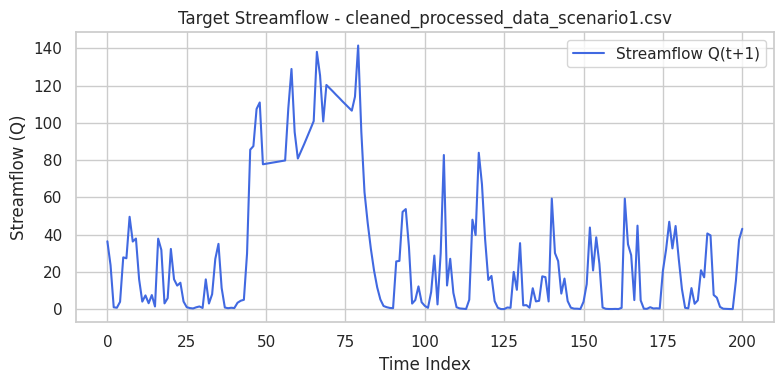

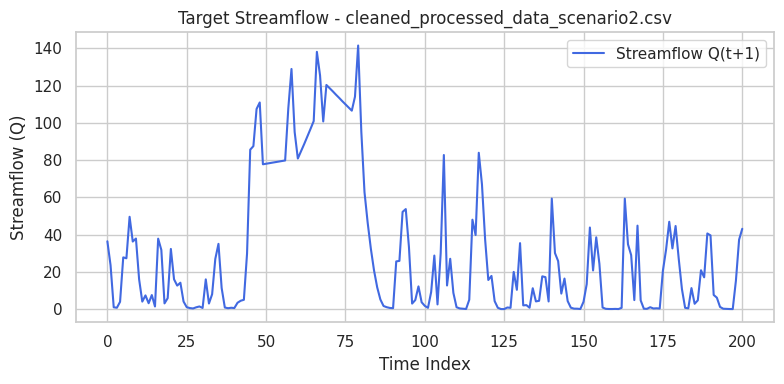

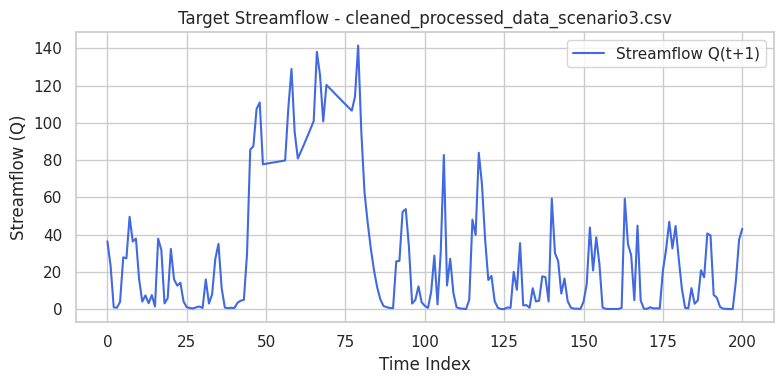

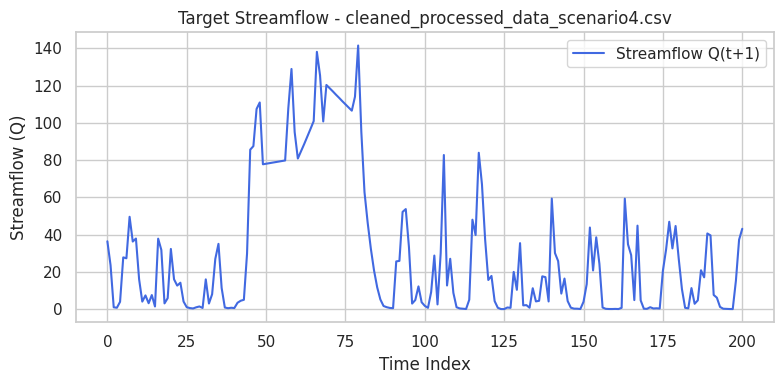

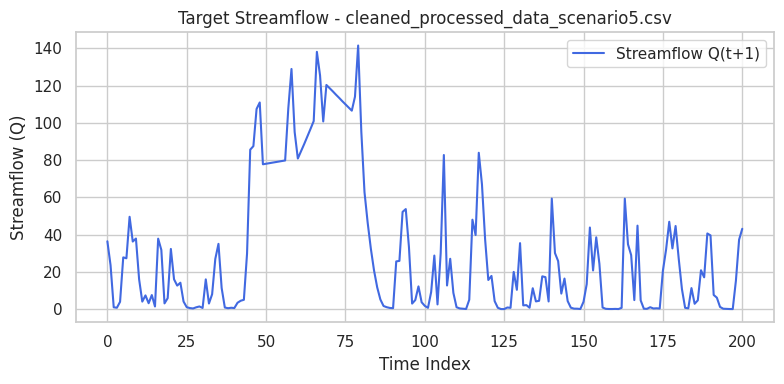

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Data directory
data_dir = 'Cleaned_Data'

# List all scenario files
scenario_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.csv')])

# Loop through each scenario
for file in scenario_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)

    # Plot the Q(t+1) target
    plt.figure(figsize=(8, 4))
    plt.plot(df['Q(t+1)'], label='Streamflow Q(t+1)', color='royalblue')
    plt.title(f'Target Streamflow - {file}')
    plt.xlabel('Time Index')
    plt.ylabel('Streamflow (Q)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Detected lag: -1 samples


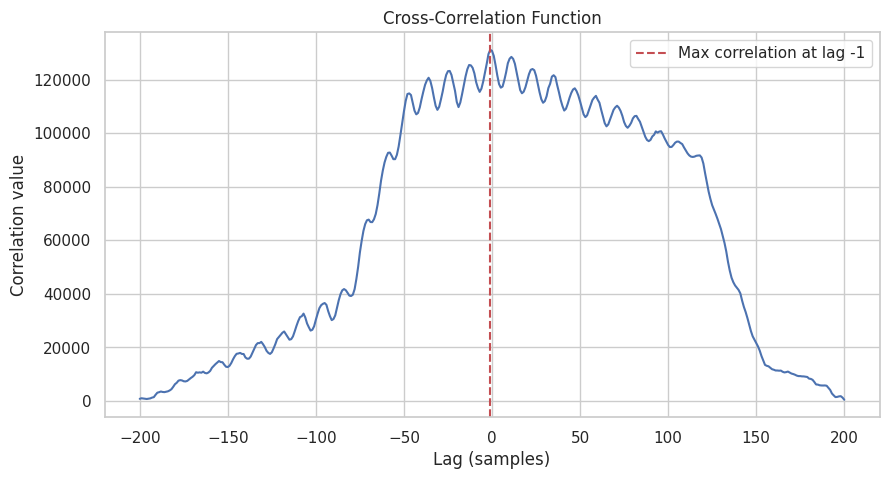

In [ ]:
# Cross Correlation Analysis Example Option 1
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

signal1 = df['T_max(t)']
signal2 = df['Q(t)']
# 2. Compute the cross-correlation
# mode='full' returns the correlation for all possible overlaps
correlation = signal.correlate(signal1, signal2, mode='full')

# 3. Compute the corresponding lag indices
lags = signal.correlation_lags(len(signal1), len(signal2))

# 4. Find the lag with the maximum correlation
max_correlation_index = np.argmax(correlation)
actual_lag = lags[max_correlation_index]

print(f"Detected lag: {actual_lag} samples")

# 5. Plot the cross-correlation function
plt.figure(figsize=(10, 5))
plt.plot(lags, correlation)
plt.axvline(x=actual_lag, color='r', linestyle='--', label=f'Max correlation at lag {actual_lag}')
plt.title('Cross-Correlation Function')
plt.xlabel('Lag (samples)')
plt.ylabel('Correlation value')
plt.legend()
plt.grid(True)
plt.show()


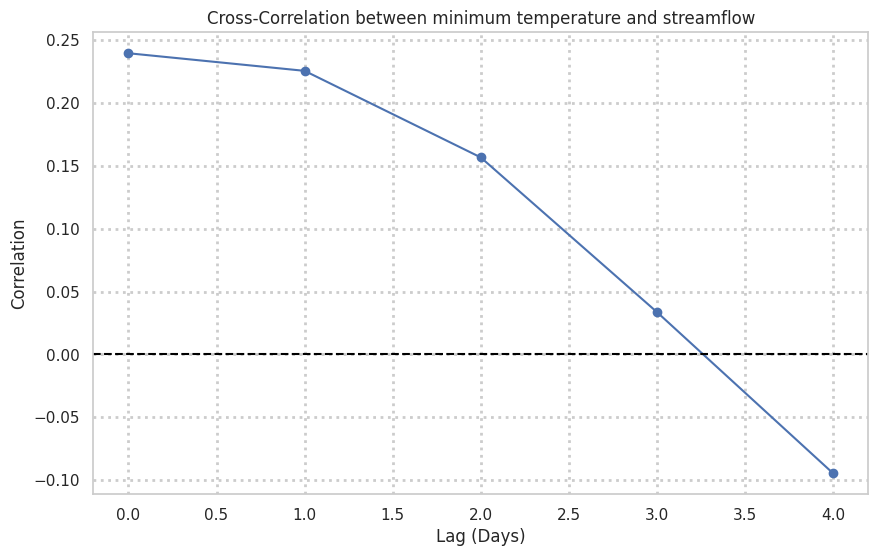

In [ ]:
# Cross Correlation Example Option 2
import matplotlib.pyplot as plt
import numpy as np
# retrive the data for AAPL and MSFT
streamflow = df['Q(t)']
predictor = df['T_min(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags (-30 to 30 days)
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between minimum temperature and streamflow')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()


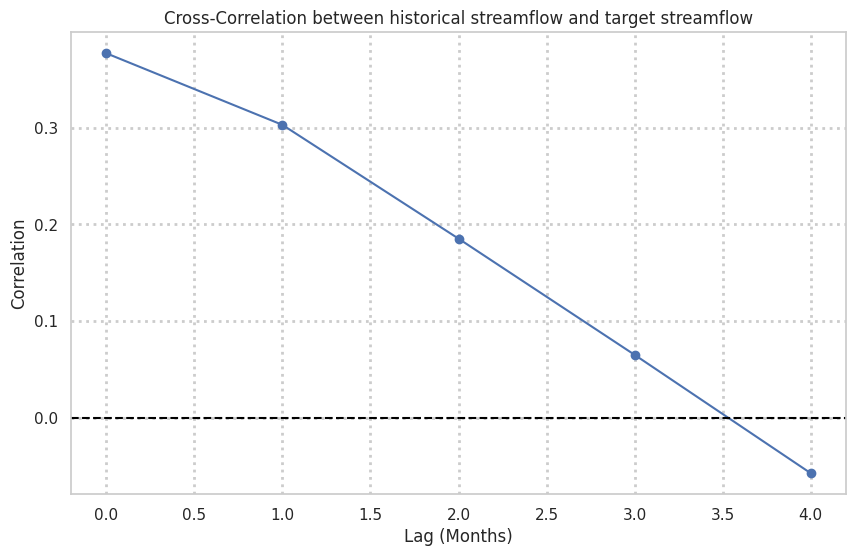

In [ ]:
# Cross Correlation Analysis for Precipitation using Option 2
import matplotlib.pyplot as plt
import numpy as np

# retrive the datasets
streamflow = df['Q(t)']
predictor = df['P(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between historical streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

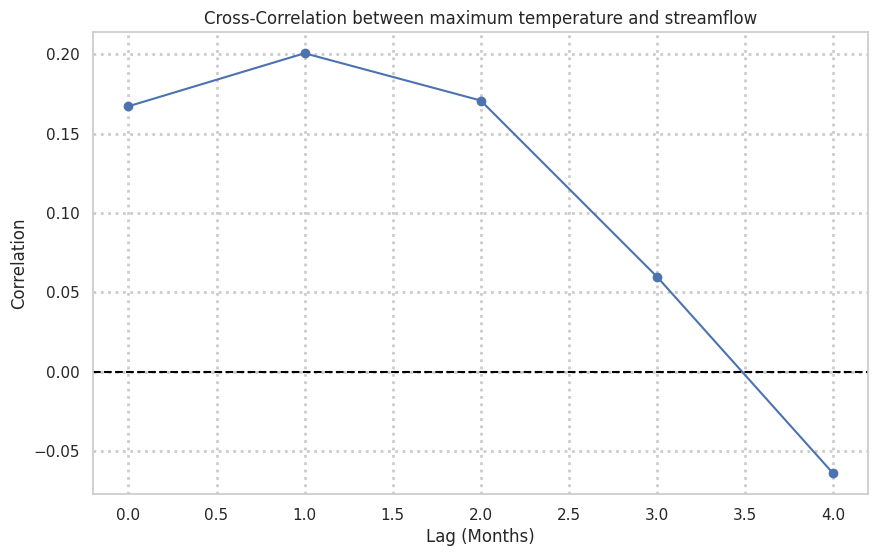

In [ ]:
# Cross Correlation Analysis for maximum temperature using Option 2
import matplotlib.pyplot as plt
import numpy as np

streamflow = df['Q(t)']
predictor = df['T_max(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between maximum temperature and streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

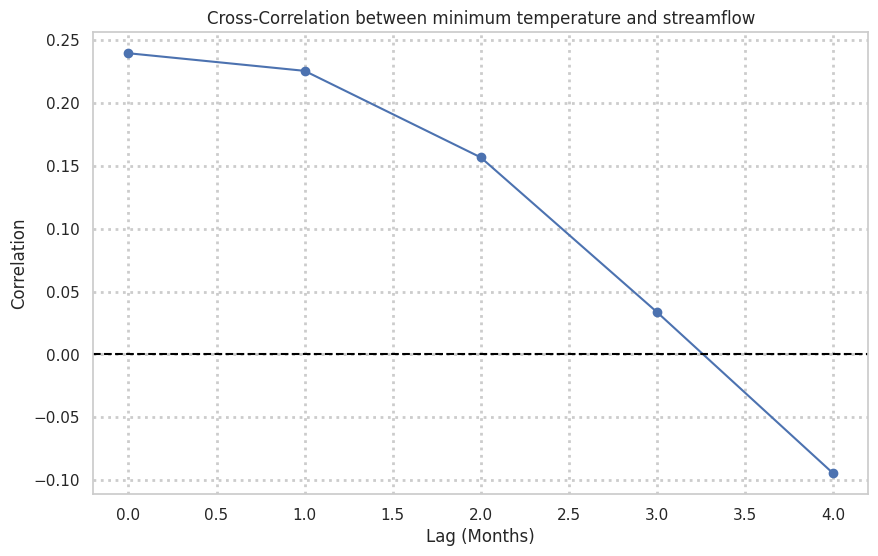

In [ ]:
# Cross Correlation Analysis for minimum temperature using Option 2
import matplotlib.pyplot as plt
import numpy as np

streamflow = df['Q(t)']
predictor = df['T_min(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between minimum temperature and streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

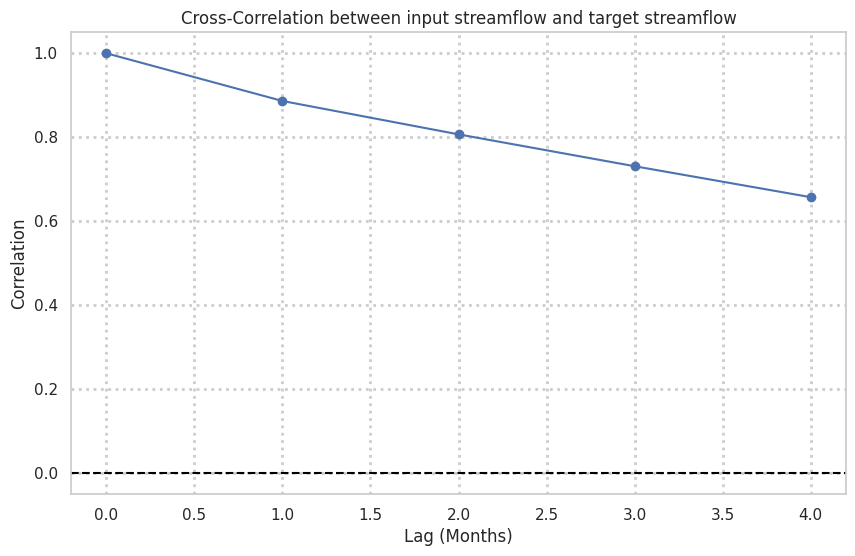

In [ ]:
# Cross Correlation Analysis for streamflow using Option 2
import matplotlib.pyplot as plt
import numpy as np

streamflow = df['Q(t)']
predictor = df['Q(t)']

# apply z normalization to the data for comparison
streamflow_norm = (streamflow - streamflow.mean()) / streamflow.std()
predictor_norm = (predictor - predictor.mean()) / predictor.std()

# define a range of lags
lags = np.arange(0,5)

# compute cross-correlation
cross_corr = [streamflow_norm.corr(predictor_norm.shift(lag)) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, marker='o')
plt.title('Cross-Correlation between input streamflow and target streamflow')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.axhline(0, color='black', linestyle='--')
plt.grid(ls=':',lw='2')
plt.show()

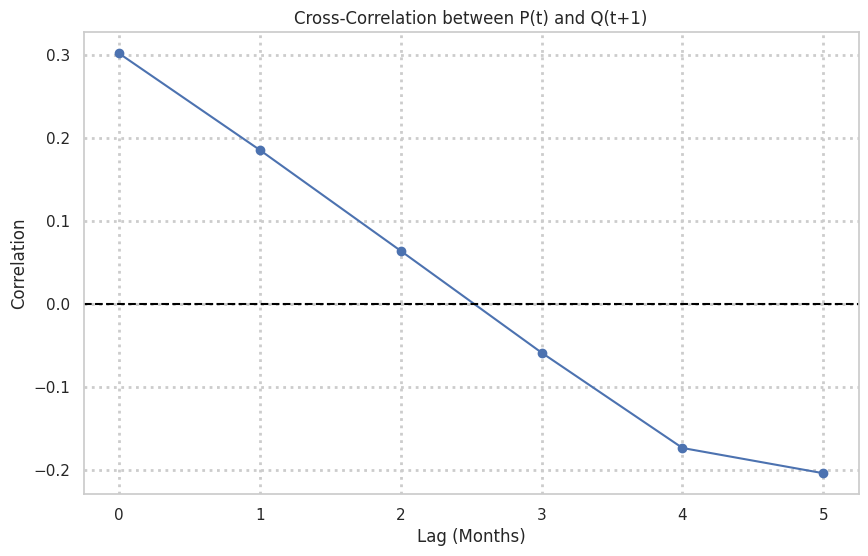

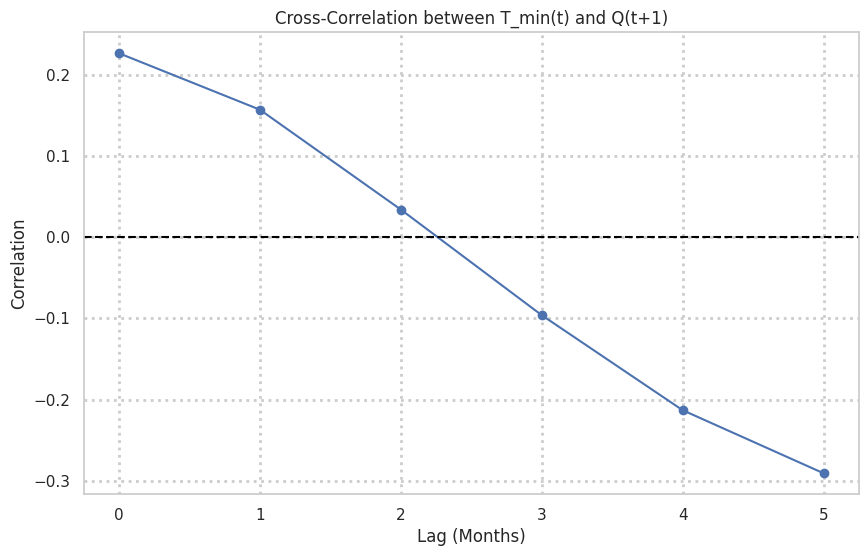

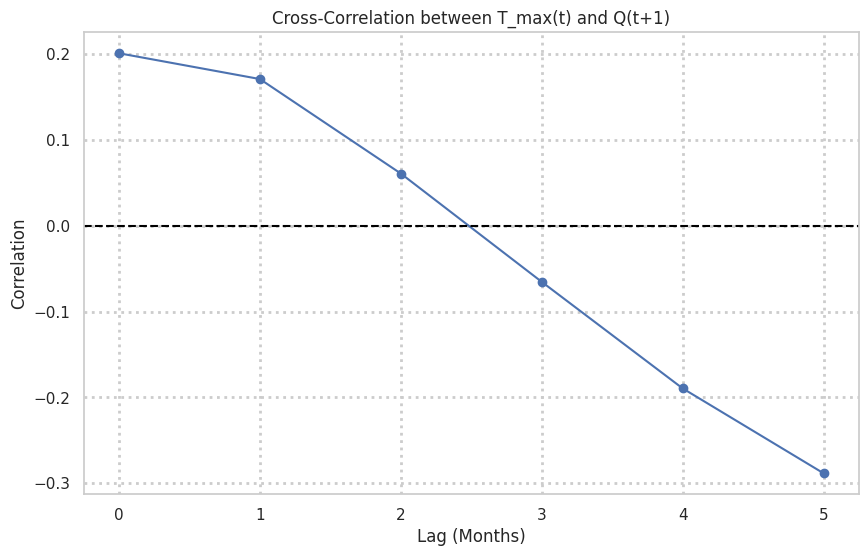

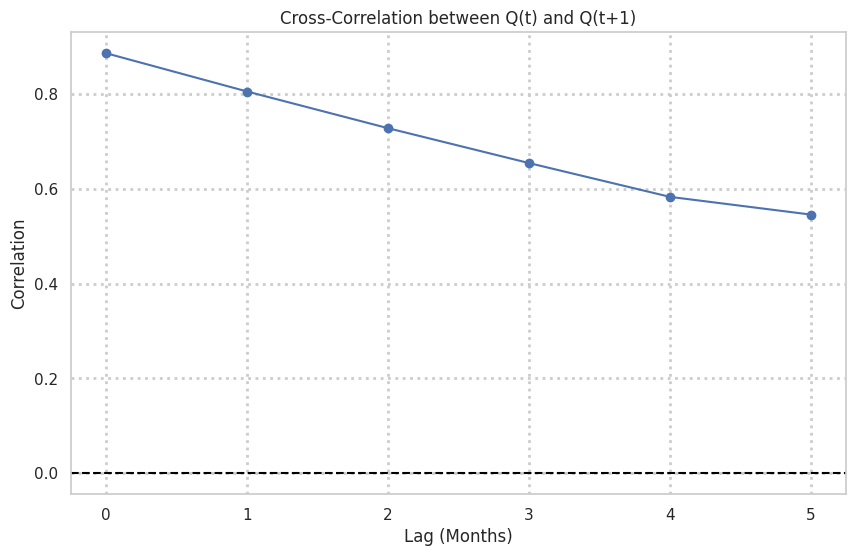

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

predictors = ['P(t)', 'T_min(t)', 'T_max(t)', 'Q(t)']
target = df['Q(t+1)']

# normalize target
target_norm = (target - target.mean()) / target.std()

lags = np.arange(0, 6)  # test lags from 0 to +5 months

for pred in predictors:
    predictor = df[pred]
    predictor_norm = (predictor - predictor.mean()) / predictor.std()

    cross_corr = [target_norm.corr(predictor_norm.shift(lag)) for lag in lags]

    plt.figure(figsize=(10, 6))
    plt.plot(lags, cross_corr, marker='o')
    plt.title(f'Cross-Correlation between {pred} and Q(t+1)')
    plt.xlabel('Lag (Months)')
    plt.ylabel('Correlation')
    plt.axhline(0, color='black', linestyle='--')
    plt.grid(ls=':', lw=2)
    plt.show()